In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import os
#MODELS
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from keras.models import load_model
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sns.set(style="whitegrid", color_codes=True)

In [2]:
curd=os.getcwd()

In [3]:
datadir=os.path.join(curd,"Data/credit_risk_dataset.csv")

In [4]:
df=pd.read_csv(datadir)

In [5]:
df.head(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2


In [6]:
df.tail(2)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26
32580,66,42000,RENT,2.0,MEDICAL,B,6475,9.99,0,0.15,N,30


# Univariate Analysis

In [7]:
numeric=df.describe()
numeric

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [8]:
N=df.shape[0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


# Null Values having attributes
### loan interest rate and person emp length

In [10]:
round(df.isnull().sum()/N*100,1).sort_values(ascending=0)

loan_int_rate                 9.6
person_emp_length             2.7
person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64

### Observation: As Null Values are much less than 50% in place of dropping the Cols we can fill them using suitable techniques

# Data Visualization

In [11]:
def colors_from_values(values, palette_name):
    # normalize the values to range [0, 1]
    normalized = (values - min(values)) / (max(values) - min(values))
    # convert to indices
    indices = np.round(normalized * (len(values) - 1)).astype(np.int32)
    # use the indices to get the colors
    palette = sns.color_palette(palette_name, len(values))
    return np.array(palette).take(indices, axis=0)

C:\Users\91626\AppData\Local\Temp\ipykernel_3048\2142648504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df.person_home_ownership.value_counts().index,y=df.person_home_ownership.value_counts().values,palette=colors_from_values(df.person_home_ownership.value_counts().values, "YlOrRd")).set_title("Home Ownership Type Counts",fontsize=30,color='Green',pad=10)
C:\Users\91626\AppData\Local\Temp\ipykernel_3048\2142648504.py:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x=df.person_home_ownership.value_counts().index,y=df.person_home_ownership.value_counts().values,palette=colors_from_values(df.person_home_ownership.value_counts().values, "YlOrRd")).set_title("Home Ownership Type Counts",fontsize=30,color='Green',pad=10)


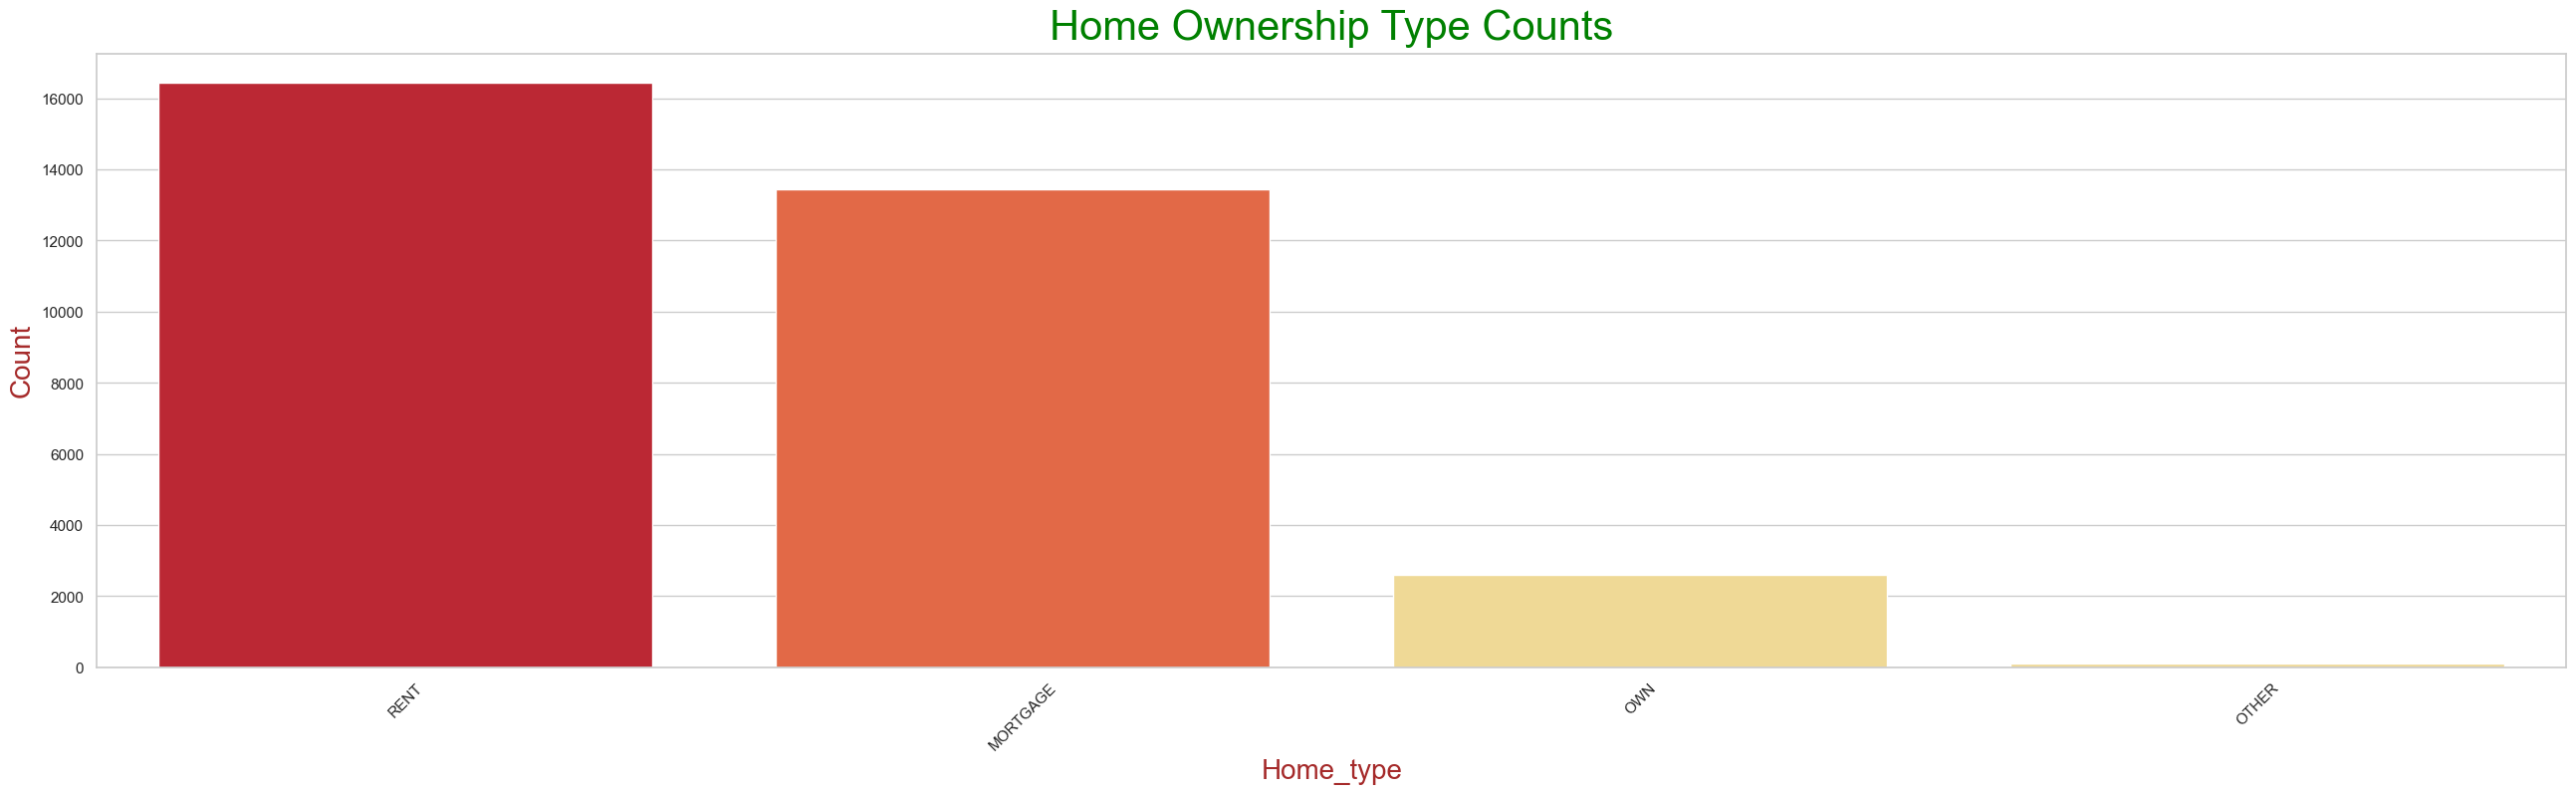

In [12]:
# #Value Counts of Home Owernship status
plt.figure(figsize=[32,8])
sns.barplot(x=df.person_home_ownership.value_counts().index,y=df.person_home_ownership.value_counts().values,palette=colors_from_values(df.person_home_ownership.value_counts().values, "YlOrRd")).set_title("Home Ownership Type Counts",fontsize=30,color='Green',pad=10)
sns.color_palette("rocket", as_cmap=True)
plt.xlabel('Home_type',fontsize=20,color='Brown')
plt.ylabel('Count',fontsize=20,color='Brown')
plt.xticks(rotation=45)
plt.show()

In [13]:
n=len(numeric.columns)
n

8

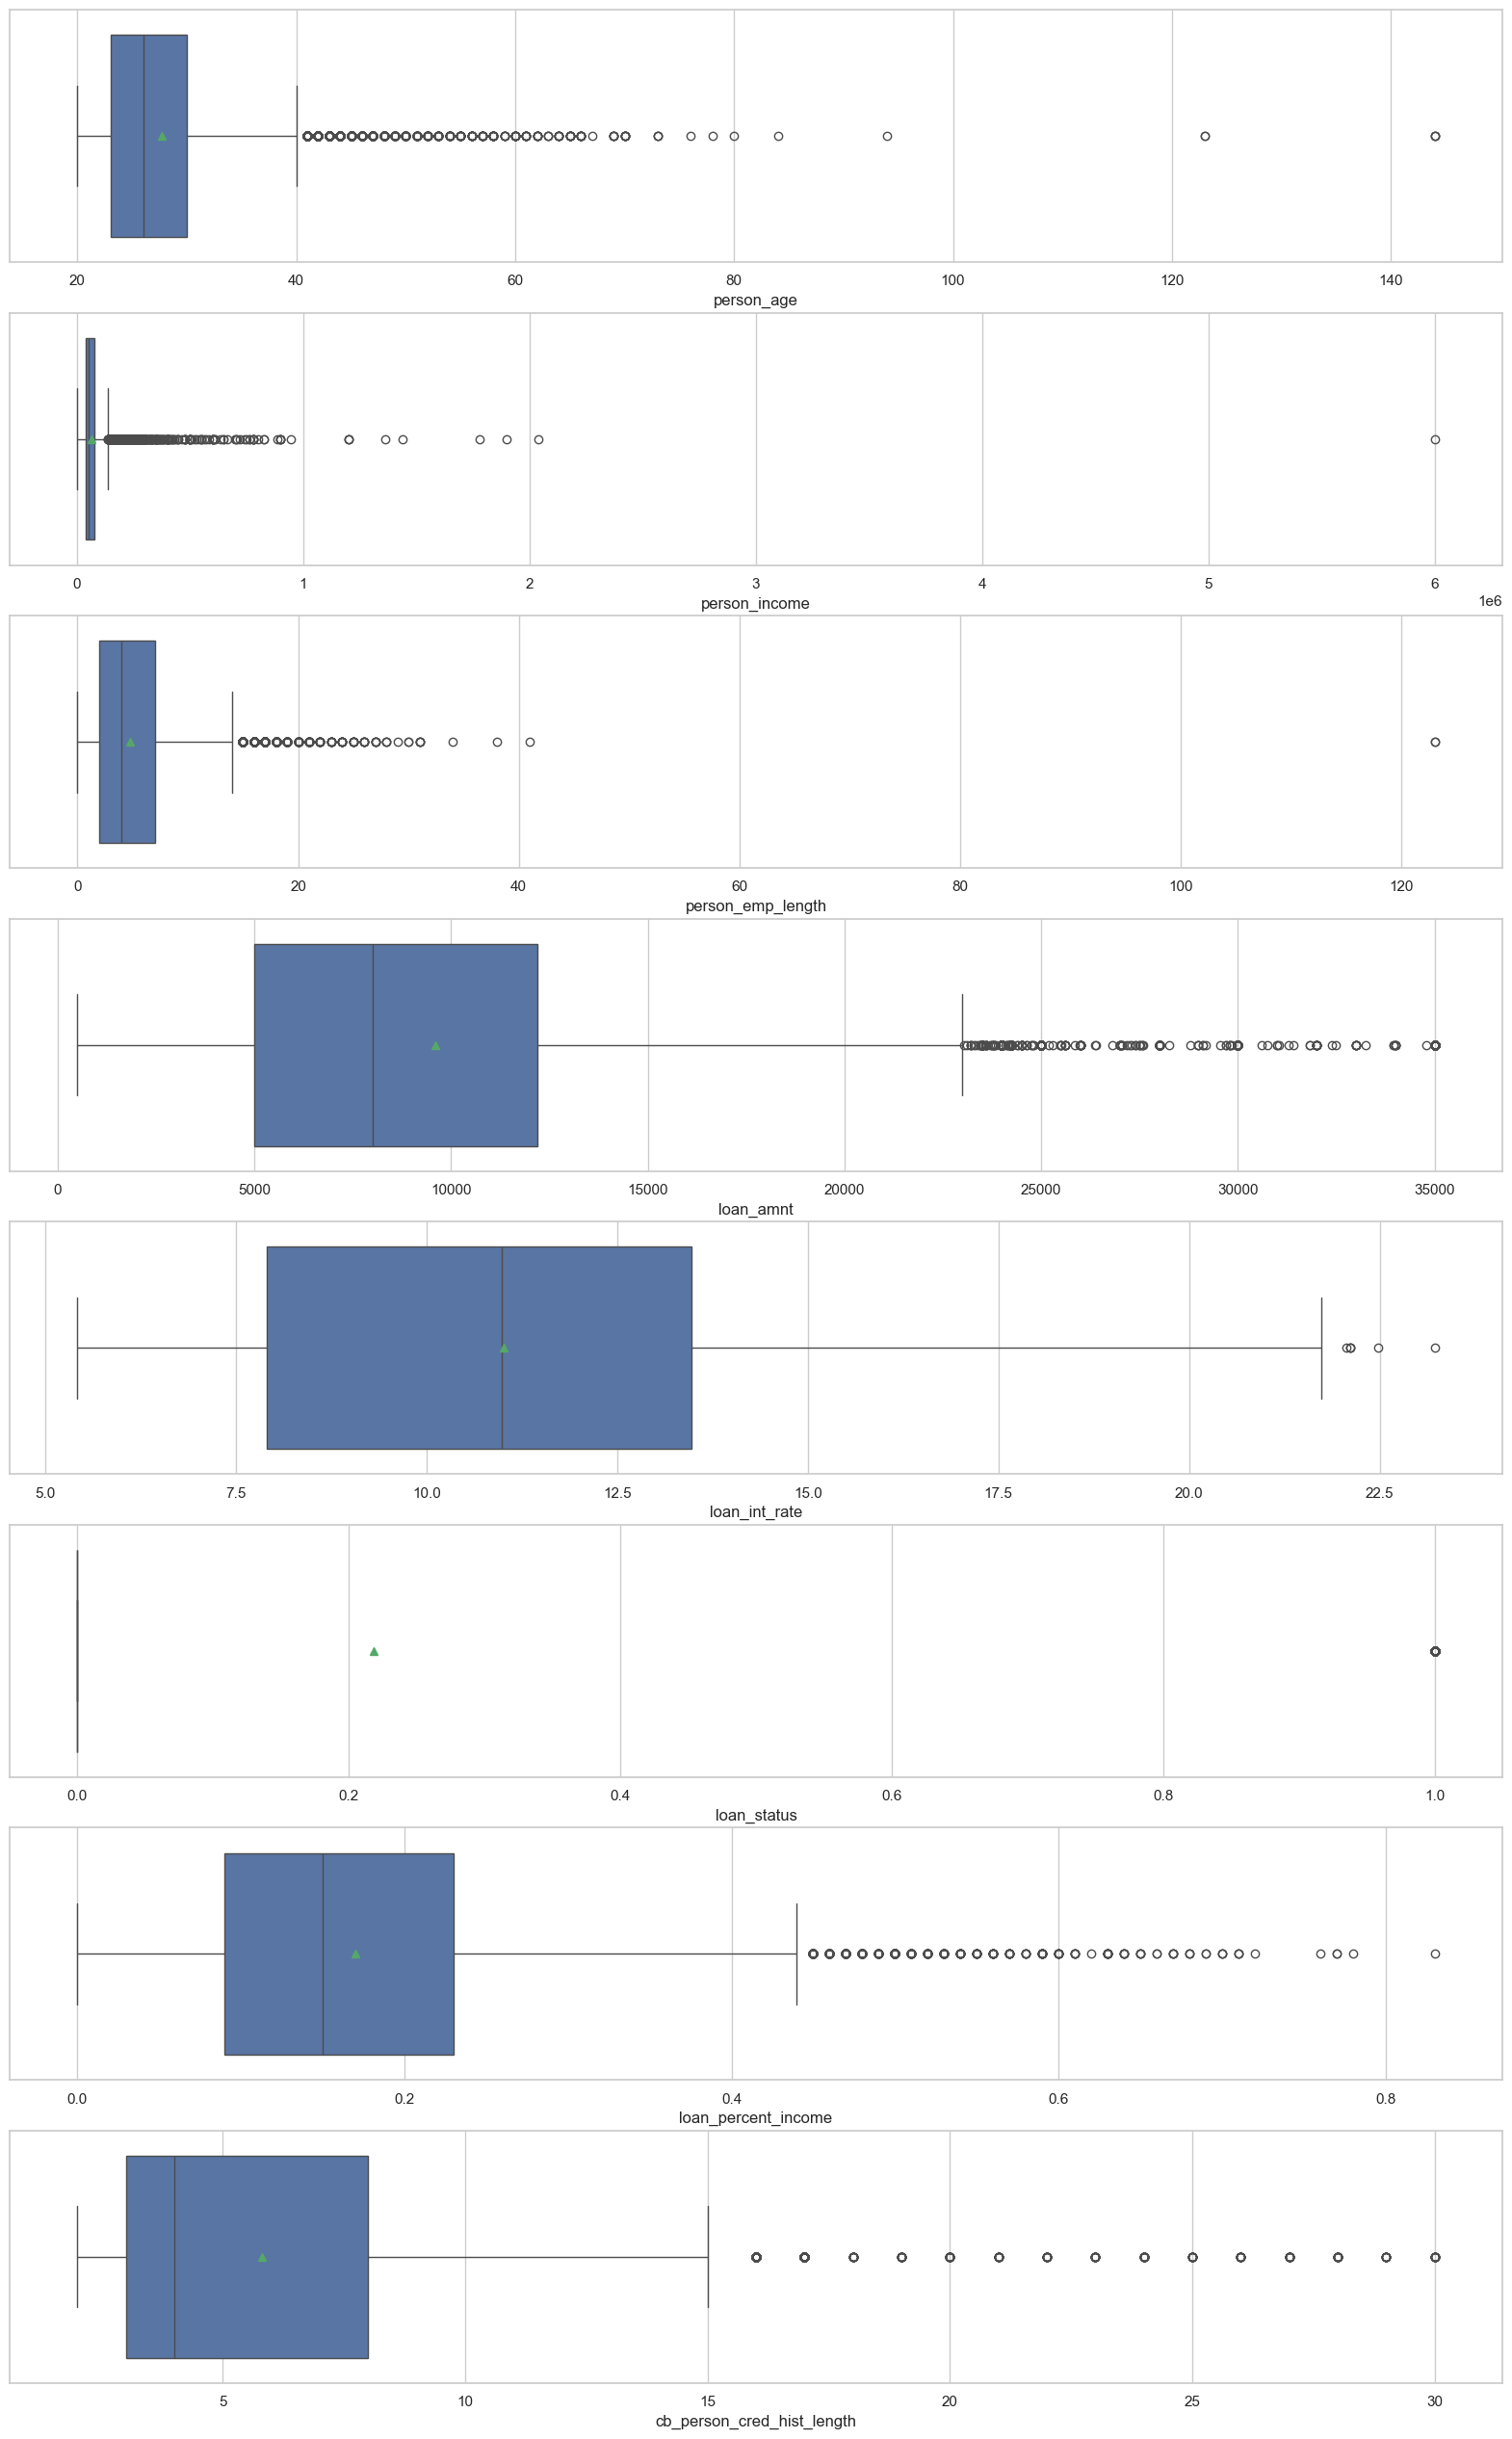

In [14]:
plt.figure(figsize=[20,32])
for i in range(1,9):
    plt.subplot(8,1,i)
    sns.boxplot(x=df[numeric.columns[i-1]],showmeans=1)
plt.show()

Text(0.5, 12.44444444444443, 'person emp length')

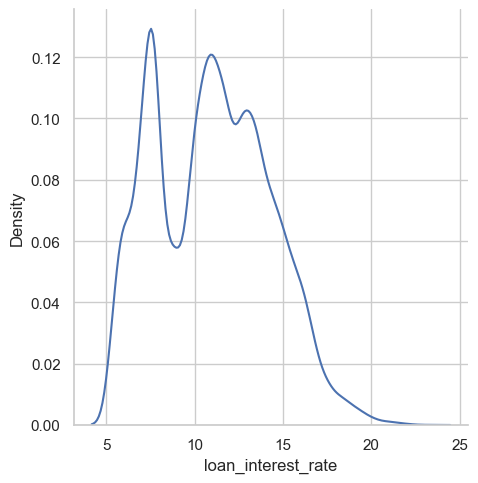

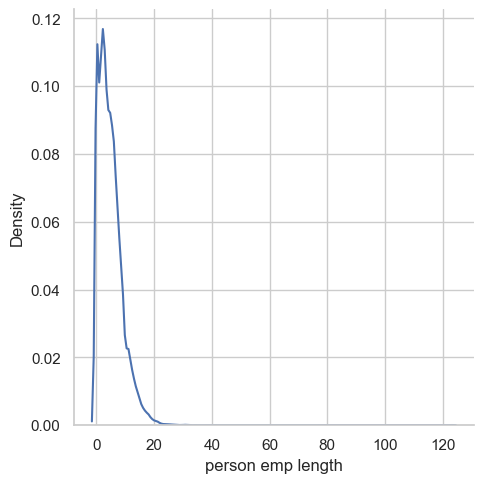

In [15]:
sns.displot(df["loan_int_rate"],kind='kde')
plt.xlabel("loan_interest_rate")

sns.displot(df["person_emp_length"],kind='kde')
plt.xlabel("person emp length")

In [16]:
# loan interest rate and person emp length

# Filling Na Values with median and mode depending on curve 

In [17]:
df['loan_int_rate'].fillna(df['loan_int_rate'].mean(),inplace=True)
df['person_emp_length'].fillna(df['person_emp_length'].median(),inplace=True)

In [18]:
print(round(df.isnull().sum()/N*100,1).sort_values(ascending=0))
print("No Null Values are left")

person_age                    0.0
person_income                 0.0
person_home_ownership         0.0
person_emp_length             0.0
loan_intent                   0.0
loan_grade                    0.0
loan_amnt                     0.0
loan_int_rate                 0.0
loan_status                   0.0
loan_percent_income           0.0
cb_person_default_on_file     0.0
cb_person_cred_hist_length    0.0
dtype: float64
No Null Values are left


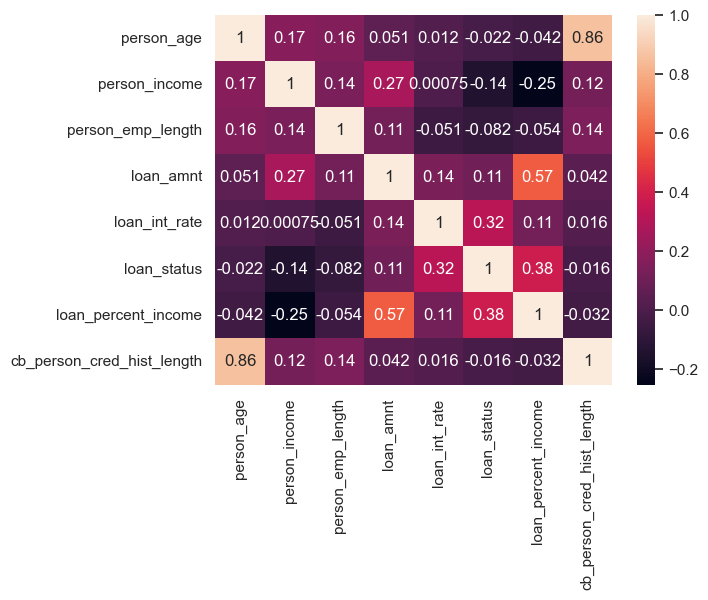

In [19]:
sns.heatmap(df.loc[:,numeric.columns].corr(),annot=True)
plt.show() 

# Preparing for Model Training 

In [20]:
temp=df["person_home_ownership"].unique()

In [21]:
MAP_FOR_HOME={}
for i in range(len(temp)):
    MAP_FOR_HOME.update({temp[i]:i+1})

In [22]:
MAP_FOR_HOME

{'RENT': 1, 'OWN': 2, 'MORTGAGE': 3, 'OTHER': 4}

In [23]:
df["person_home_ownership"]=df["person_home_ownership"].map(MAP_FOR_HOME)

In [24]:
MAP_FOR_LOANINTENT={}
temp=df["loan_intent"].unique()
for i in range(len(temp)):
    MAP_FOR_LOANINTENT.update({temp[i]:i+1})
df["loan_intent"]=df["loan_intent"].map(MAP_FOR_LOANINTENT)
MAP_FOR_LOANINTENT

{'PERSONAL': 1,
 'EDUCATION': 2,
 'MEDICAL': 3,
 'VENTURE': 4,
 'HOMEIMPROVEMENT': 5,
 'DEBTCONSOLIDATION': 6}

In [25]:
MAP_FOR_LOANGRADE={}
temp=df["loan_grade"].unique()
t=[]
for i in range(len(temp)):
    t.append(temp[i])
temp=t
temp.sort()
for i in range(len(temp)):
    MAP_FOR_LOANGRADE.update({temp[i]:i})
df["loan_grade"]=df["loan_grade"].map(MAP_FOR_LOANGRADE)
MAP_FOR_LOANGRADE

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6}

In [26]:
df.tail(21)
df["cb_person_default_on_file"]=df["cb_person_default_on_file"].map({'N':0,'Y':1})

In [27]:
df.corr()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.031330,0.161454,0.025382,0.014218,0.050787,0.011873,-0.021629,-0.042411,0.005807,0.859133
person_income,0.173202,1.000000,0.199315,0.135164,0.016113,-0.001022,0.266820,0.000752,-0.144449,-0.254471,-0.003613,0.117987
person_home_ownership,0.031330,0.199315,1.000000,0.227919,0.017682,-0.119541,0.128938,-0.132310,-0.218714,-0.135376,-0.061556,0.025155
person_emp_length,0.161454,0.135164,0.227919,1.000000,0.016019,-0.045305,0.113851,-0.051260,-0.082182,-0.054134,-0.026761,0.143069
loan_intent,0.025382,0.016113,0.017682,0.016019,1.000000,0.013898,0.018725,0.006013,0.065381,-0.001939,0.010508,0.016905
loan_grade,0.014218,-0.001022,-0.119541,-0.045305,0.013898,1.000000,0.145799,0.889922,0.373080,0.123021,0.537054,0.015069
loan_amnt,0.050787,0.266820,0.128938,0.113851,0.018725,0.145799,1.000000,0.139488,0.105376,0.572612,0.039081,0.041967
loan_int_rate,0.011873,0.000752,-0.132310,-0.051260,0.006013,0.889922,0.139488,1.000000,0.319342,0.114520,0.477137,0.015788
loan_status,-0.021629,-0.144449,-0.218714,-0.082182,0.065381,0.373080,0.105376,0.319342,1.000000,0.379366,0.179141,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.135376,-0.054134,-0.001939,0.123021,0.572612,0.114520,0.379366,1.000000,0.035910,-0.031690


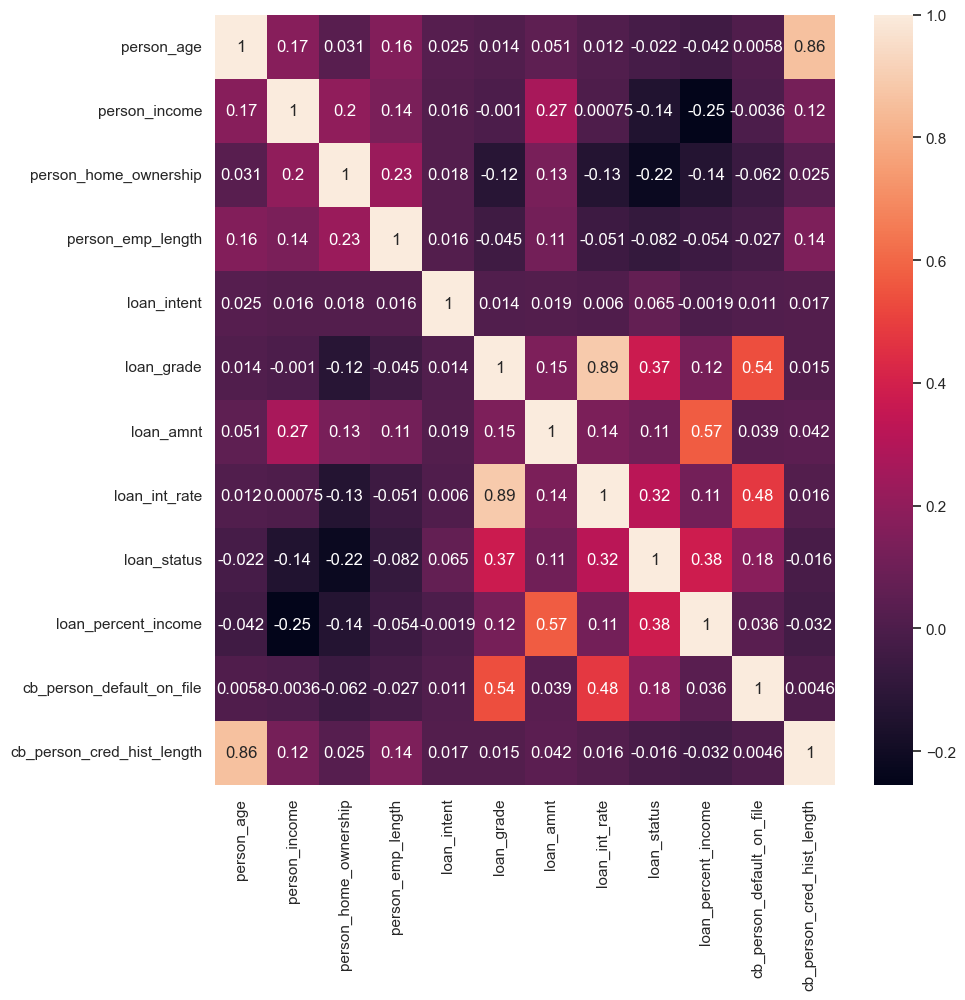

In [28]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [29]:
X=df.drop("loan_grade",axis=1)
y=df["loan_grade"]


In [30]:
object= StandardScaler()
scale = object.fit_transform(df)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,)
X_train_scaled=object.fit_transform(X_train)
X_test_scaled=object.fit_transform(X_test)
X_test_scaled.shape

(6517, 11)

# Base Model

In [31]:
in_dim=len(df.columns)-1
model = Sequential()
model.add(Dense(256, input_dim = in_dim, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(16, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(8, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(7, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history=model.fit(X_train_scaled, y_train, epochs = 50, batch_size = 100,validation_split = 0.2,verbose=1)

Epoch 1/50
209/209 [==============================] - 4s 9ms/step - loss: 1.6777 - accuracy: 0.3135 - val_loss: 1.2081 - val_accuracy: 0.5139
Epoch 2/50
209/209 [==============================] - 2s 10ms/step - loss: 1.2088 - accuracy: 0.5019 - val_loss: 0.8728 - val_accuracy: 0.6819
Epoch 3/50
209/209 [==============================] - 3s 12ms/step - loss: 0.9999 - accuracy: 0.6241 - val_loss: 0.7415 - val_accuracy: 0.7692
Epoch 4/50
209/209 [==============================] - 2s 11ms/step - loss: 0.9035 - accuracy: 0.6494 - val_loss: 0.6826 - val_accuracy: 0.7771
Epoch 5/50
209/209 [==============================] - 2s 9ms/step - loss: 0.8638 - accuracy: 0.6672 - val_loss: 0.6320 - val_accuracy: 0.7740
Epoch 6/50
209/209 [==============================] - 2s 11ms/step - loss: 0.8332 - accuracy: 0.7052 - val_loss: 0.6182 - val_accuracy: 0.7765
Epoch 7/50
209/209 [==============================] - 3s 13ms/step - loss: 0.7991 - accuracy: 0.7274 - val_loss: 0.6033 - val_accuracy: 0.7756
E

In [32]:
check=model.evaluate(X_test_scaled,y_test)
check[1]

204/204 [==============================] - 1s 2ms/step - loss: 0.5785 - accuracy: 0.8321


0.8321313261985779

In [33]:
dic={
    0:'A',
    1:'B',
    2:'C',
    3:'D',
    4:'E',
    5:'F',
    6:'G',
}

In [37]:
pred=model.predict(X_test_scaled)
actual=y_test
dis=0
mat=0
nt=100
for i in range(nt):
    maxi=0
    P=""
    A=""
    for j in range(7):
        maxi=max(maxi,pred[i][j])
    for j in range(7):
        if(maxi==pred[i][j]):
            P=dic[j]
            break
    A=dic[y_test.iloc[i]]
    if(A==P):
        print(f'matched at {i} actual value is {A} predicted value is {P}')
        mat+=1
    else:
        print(f'Failed at {i} actual value is {A} predicted value is {P}')
        dis+=1
    print("-----")
print(f"Out of {nt} samples {mat} were correct and {dis} were false")

204/204 [==============================] - 0s 2ms/step
matched at 0 actual value is A predicted value is A
-----
matched at 1 actual value is A predicted value is A
-----
matched at 2 actual value is B predicted value is B
-----
Failed at 3 actual value is C predicted value is D
-----
matched at 4 actual value is A predicted value is A
-----
matched at 5 actual value is C predicted value is C
-----
Failed at 6 actual value is B predicted value is A
-----
matched at 7 actual value is A predicted value is A
-----
matched at 8 actual value is B predicted value is B
-----
Failed at 9 actual value is C predicted value is B
-----
matched at 10 actual value is A predicted value is A
-----
matched at 11 actual value is B predicted value is B
-----
matched at 12 actual value is A predicted value is A
-----
matched at 13 actual value is C predicted value is C
-----
matched at 14 actual value is C predicted value is C
-----
matched at 15 actual value is A predicted value is A
-----
matched at 16 

In [35]:
print(f"Accuracy stood at {round(check[1]*100,2)}")

Accuracy stood at 83.21
